In [1]:
import csv 
import numpy as np 
import tensorflow as tf 
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import skimage


In [2]:
# y = ["" for x in range(2000)]
# for i in range(1000):
#     y[i] = "blues"

# for i in range(1000, 2000):
#     y[i] = "classical" 

# for i in range(2000, 3000):
#     y[i] = "country"

y = []
for i in range(1000):
    y.append(0)

for i in range(1000, 2000):
    y.append(1)

for i in range(2000, 3000):
    y.append(2)

for i in range(3000, 4000):
    y.append(3)

for i in range(4000, 5000):
    y.append(4)

for i in range(5000, 6000):
    y.append(5)

for i in range(6000, 7000):
    y.append(6)

for i in range(7000, 8000):
    y.append(7)

for i in range(8000, 9000):
    y.append(8)

for i in range(9000, 10000):
    y.append(9)



# y[1000:1999] = 'classical' 
# y[2000:2999] = 'country'


In [3]:
# X = np.zeros((3000, 717, 908, 3))


# genre = 'blues'
# ext = '.png'
# folder = 'proj_images/proj_images/'
# ind = 0
# for i in range(1000):
#     file = folder + genre + str(i) + ext 
#     print("reading", file)
#     X[ind, :, :, :] = imageio.imread(file)
#     ind += 1

# genre = 'classical'
# for i in range(1000):
#     file = folder + genre + str(i) + ext 
#     print("reading", file)
#     X[ind, :, :, :] = imageio.imread(file)
#     ind+= 1

# genre = 'country'
# for i in range(1000):
#     if i != 733:
#         file = folder + genre + str(i) + ext 
#         print("reading", file)
#         X[ind, :, :, :] = imageio.imread(file)
#         ind += 1


X = np.zeros((10000, 359, 454))

print(skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread('proj_images/proj_images/blues0.png')), 2).shape)

genre = 'blues'
ext = '.png'
folder = 'proj_images/proj_images/'
ind = 0
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X[ind, :, :] = skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread(file)), 2)
    ind += 1

genre = 'classical'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X[ind, :, :] = skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread(file)), 2)
    ind+= 1

genre = 'country'
for i in range(1000):
    if i < 733:
    # Issue with country733.png 
        file = folder + genre + str(i) + ext 
        print("reading", file)
        X[ind, :, :] = skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread(file)), 2)
        ind += 1

ind = 3000
genre = 'disco'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X[ind, :, :] = skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread(file)), 2)
    ind+= 1

genre = 'hiphop'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X[ind, :, :] = skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread(file)), 2)
    ind+= 1

genre = 'jazz'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X[ind, :, :] = skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread(file)), 2)
    ind+= 1

genre = 'metal'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X[ind, :, :] = skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread(file)), 2)
    ind+= 1

genre = 'pop'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X[ind, :, :] = skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread(file)), 2)
    ind+= 1

genre = 'reggae'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X[ind, :, :] = skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread(file)), 2)
    ind+= 1

genre = 'rock'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X[ind, :, :] = skimage.measure.block_reduce(skimage.color.rgb2gray(imageio.imread(file)), 2)
    ind+= 1

(359, 454)
reading proj_images/proj_images/blues0.png
reading proj_images/proj_images/blues1.png
reading proj_images/proj_images/blues2.png
reading proj_images/proj_images/blues3.png
reading proj_images/proj_images/blues4.png
reading proj_images/proj_images/blues5.png
reading proj_images/proj_images/blues6.png
reading proj_images/proj_images/blues7.png
reading proj_images/proj_images/blues8.png
reading proj_images/proj_images/blues9.png
reading proj_images/proj_images/blues10.png
reading proj_images/proj_images/blues11.png
reading proj_images/proj_images/blues12.png
reading proj_images/proj_images/blues13.png
reading proj_images/proj_images/blues14.png
reading proj_images/proj_images/blues15.png
reading proj_images/proj_images/blues16.png
reading proj_images/proj_images/blues17.png
reading proj_images/proj_images/blues18.png
reading proj_images/proj_images/blues19.png
reading proj_images/proj_images/blues20.png
reading proj_images/proj_images/blues21.png
reading proj_images/proj_images

(10000, 359, 454)


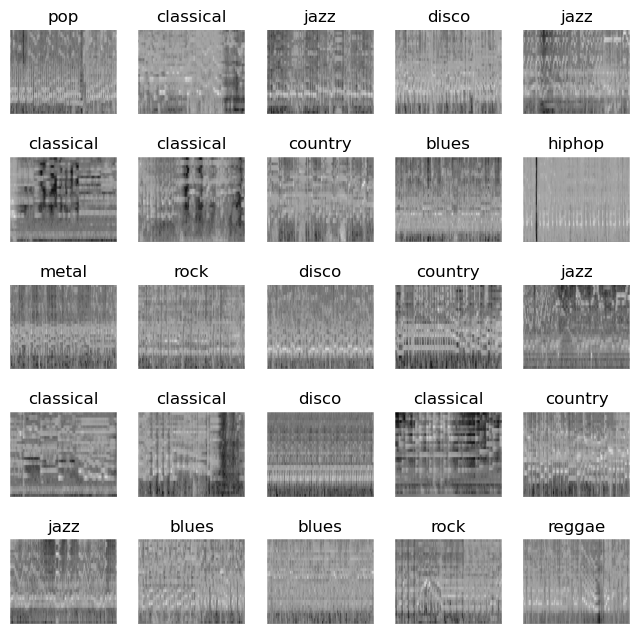

In [4]:
label_map = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

print(np.shape(X))

#Visualizing our data.
fig, axes1 = plt.subplots(5, 5, figsize=(8, 8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0], cmap='gray')
        axes1[j][k].set_title(label_map[y[i]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X[0:6000, :, :], y[0:6000], test_size = 0.10, random_state = 31)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1, 1), activation='relu', input_shape = (359, 454, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 355, 450, 32)      832       
                                                                 
 batch_normalization (BatchN  (None, 355, 450, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 177, 224, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 224, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 177, 224, 64)     256       
 hNormalization)                                                 
                                                        

2022-12-01 23:33:43.699733: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


169/169 [==============================] - 925s 5s/step - loss: 18.3135 - accuracy: 0.4430 - val_loss: 313.2741 - val_accuracy: 0.2017
Epoch 2/10
169/169 [==============================] - 883s 5s/step - loss: 2.6373 - accuracy: 0.5267 - val_loss: 480.6920 - val_accuracy: 0.2000
Epoch 3/10
169/169 [==============================] - 11712s 70s/step - loss: 1.6520 - accuracy: 0.4815 - val_loss: 99.3916 - val_accuracy: 0.2000
Epoch 4/10
169/169 [==============================] - 31359s 181s/step - loss: 1.3342 - accuracy: 0.5293 - val_loss: 159.2308 - val_accuracy: 0.2000
Epoch 5/10
169/169 [==============================] - 1033s 6s/step - loss: 1.2733 - accuracy: 0.5300 - val_loss: 1.5730 - val_accuracy: 0.4450
Epoch 6/10
169/169 [==============================] - 1081s 6s/step - loss: 1.3548 - accuracy: 0.5707 - val_loss: 44.2897 - val_accuracy: 0.2333
Epoch 7/10
 42/169 [======>.......................] - ETA: 16:02 - loss: 1.2557 - accuracy: 0.5618

KeyboardInterrupt: 

In [ ]:
X = np.array([], dtype = 'object')

np.append(X, 1)


genre = 'blues'
ext = '.png'
folder = 'proj_images/'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    np.append(X, imageio.imread(file))

genre = 'classical'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    np.append(X, imageio.imread(file))

genre = 'country' 
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    np.append(X, imageio.imread(file))

print(np.shape(X))